In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 

In [4]:
higgs = pd.read_pickle('../Lab5/higgs_100000_pt_1000_1200.pkl')
qcd = pd.read_pickle('../Lab5/qcd_100000_pt_1000_1200.pkl')

In [60]:
normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)

print(normalization_higgs, normalization_qcd)

0.0005 0.02


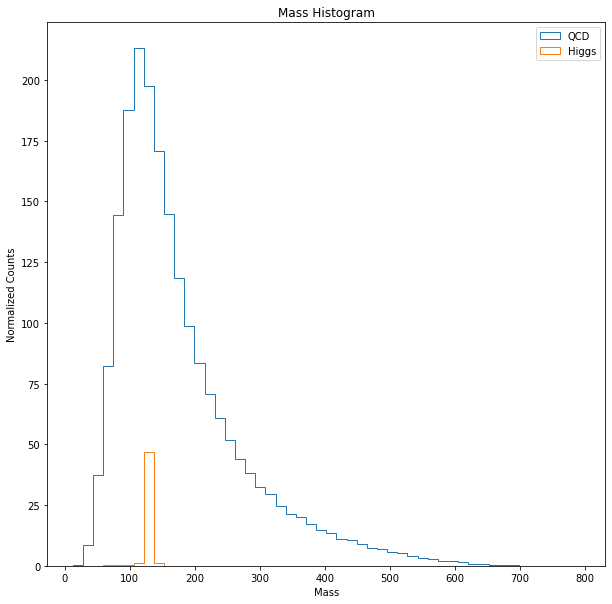

In [61]:
fig, ax = plt.subplots(1, figsize = (10,10))

hist_qcd = ax.hist(qcd['mass'], weights = np.ones(len(qcd))*normalization_qcd, bins = 50, histtype = 'step', label = 'QCD');
hist_higgs = ax.hist(higgs['mass'], weights = np.ones(len(higgs))*normalization_higgs, bins = hist_qcd[1], histtype = 'step', label = 'Higgs');

ax.set_title('Mass Histogram')
ax.set_ylabel('Normalized Counts')
ax.set_xlabel('Mass')
plt.legend()
plt.show()

In [62]:
n_qcd = 2000
n_higgs = 50

prob = stats.poisson.sf(n_qcd + n_higgs, n_qcd)
sigma  = stats.norm.isf(prob)

approx_sig = n_higgs/np.sqrt(n_qcd)

print(sigma, approx_sig)

1.1282230087754423 1.118033988749895


They are not the same, which means that the approximation doesn't match the model that I've used. But it is very close since the model is a Poisson with high mean which is like a Gaussian. The approximation is for a Gaussian.

In [63]:
mass_cut = [180, 150, 140, 135, 130]

for i in mass_cut:
    print(f'mass cut: {i}') 

    cut_qcd = qcd[qcd['mass'] < i]
    cut_higgs = higgs[higgs['mass'] < i]
    
    n_qcd = 2000/len(qcd)*len(cut_qcd)
    n_higgs = 50/len(higgs)*len(cut_higgs)

    print(f'N_qcd: {n_qcd:0.3f} N_higgs: {n_higgs:0.3f}')

    prob = stats.poisson.sf(n_qcd + n_higgs, n_qcd)
    sigma = stats.norm.isf(prob)

    approx_sigma = n_higgs/np.sqrt(n_qcd)

    print(f'sigma: {sigma:.3f} approximate sigma: {approx_sigma:.3f}\n')

mass cut: 180
N_qcd: 1279.380 N_higgs: 50.000
sigma: 1.397 approximate sigma: 1.398

mass cut: 150
N_qcd: 1017.320 N_higgs: 49.998
sigma: 1.566 approximate sigma: 1.568

mass cut: 140
N_qcd: 908.900 N_higgs: 49.643
sigma: 1.636 approximate sigma: 1.647

mass cut: 135
N_qcd: 850.200 N_higgs: 47.847
sigma: 1.647 approximate sigma: 1.641

mass cut: 130
N_qcd: 786.880 N_higgs: 39.948
sigma: 1.407 approximate sigma: 1.424



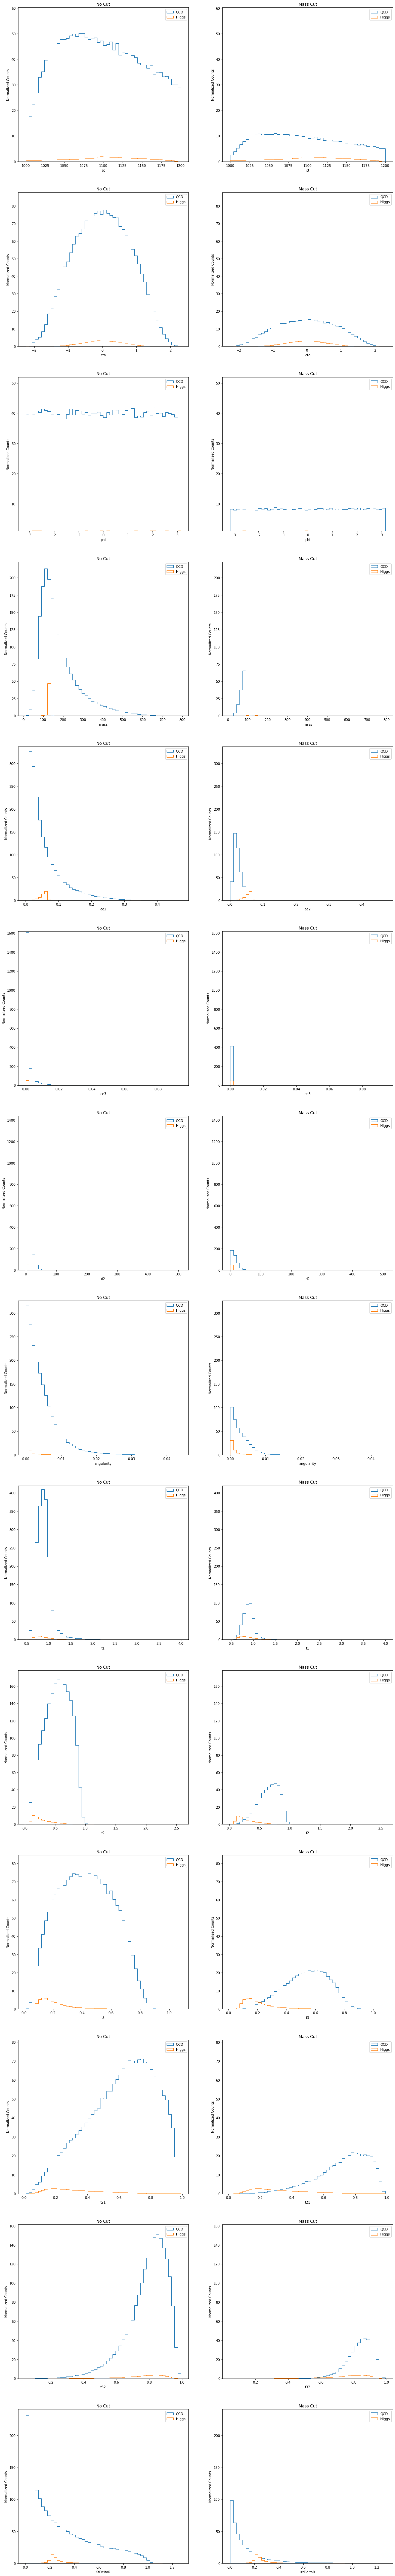

In [64]:
keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

title = ['No Cut', 'Mass Cut']

normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)

cut_qcd = qcd[qcd['mass']<140]
cut_higgs = higgs[higgs['mass']<140]

normalization_qcd_cut = 2000/len(qcd)*len(cut_qcd)/len(qcd)
normalization_higgs_cut = 50/len(higgs)*len(cut_higgs)/len(higgs)

def get_ylims(y1, y2, y3, y4):
    all_y = np.hstack((y1, y2, y3, y4))
    
    ymax = all_y.max()+10
    ymin = all_y.min()
    
    #print(all_y)
   
    return ymax, ymin

fig, ax = plt.subplots(14, 2, figsize = (20,140))

for i in range(len(keys)):
#for i in range(1):
    hist1 = ax[i,0].hist(qcd[keys[i]], weights = np.ones(len(qcd))*normalization_qcd, bins = 50, histtype = 'step' ,label = 'QCD');
    hist2 = ax[i,0].hist(higgs[keys[i]], weights = np.ones(len(higgs))*normalization_higgs, bins = hist1[1], histtype = 'step' ,label = 'Higgs');

    hist3 = ax[i,1].hist(cut_qcd[keys[i]], weights = np.ones(len(cut_qcd))*normalization_qcd_cut, bins = hist1[1], histtype = 'step' , label = 'QCD');
    hist4 = ax[i,1].hist(cut_higgs[keys[i]], weights = np.ones(len(cut_higgs))*normalization_higgs_cut, bins = hist1[1], histtype = 'step', label = 'Higgs');
    
    #print(hist1[0], hist2[0], hist3[0], hist4[0])
    
    ymax, ymin = get_ylims(hist1[0], hist2[0], hist3[0], hist4[0])
    #print(ymin, ymax)
    
    for k in range(len(title)):
        ax[i,k].set_ylim(ymin, ymax)
        ax[i,k].set_title(title[k])
        ax[i,k].set_ylabel('Normalized Counts')
        ax[i,k].set_xlabel(keys[i])          
        ax[i,k].legend()
plt.show()

In [65]:
t21_cut = [0.6, 0.5, 0.4, 0.3]

for i in t21_cut:
    print(f't12 cut: {i}') 
    cut2_qcd = cut_qcd[cut_qcd['t21'] < i]
    cut2_higgs = cut_higgs[cut_higgs['t21'] < i]
    
    n_qcd = 2000/len(qcd)*len(cut_qcd)/len(qcd)*len(cut2_qcd)
    n_higgs = 50/len(higgs)*len(cut_higgs)/len(higgs)*len(cut2_higgs)

    print(f'N_qcd: {n_qcd:0.3f} N_higgs: {n_higgs:0.3f}')

    prob = stats.poisson.sf(n_qcd + n_higgs, n_qcd)
    sigma = stats.norm.isf(prob)

    approx_sigma = n_higgs/np.sqrt(n_qcd)

    print(f'sigma: {sigma:.3f} approximate sigma: {approx_sigma:.3f}\n')

t12 cut: 0.6
N_qcd: 87.145 N_higgs: 44.605
sigma: 4.432 approximate sigma: 4.778

t12 cut: 0.5
N_qcd: 45.036 N_higgs: 40.046
sigma: 5.379 approximate sigma: 5.967

t12 cut: 0.4
N_qcd: 19.905 N_higgs: 33.745
sigma: 6.244 approximate sigma: 7.564

t12 cut: 0.3
N_qcd: 7.026 N_higgs: 25.119
sigma: 7.018 approximate sigma: 9.477



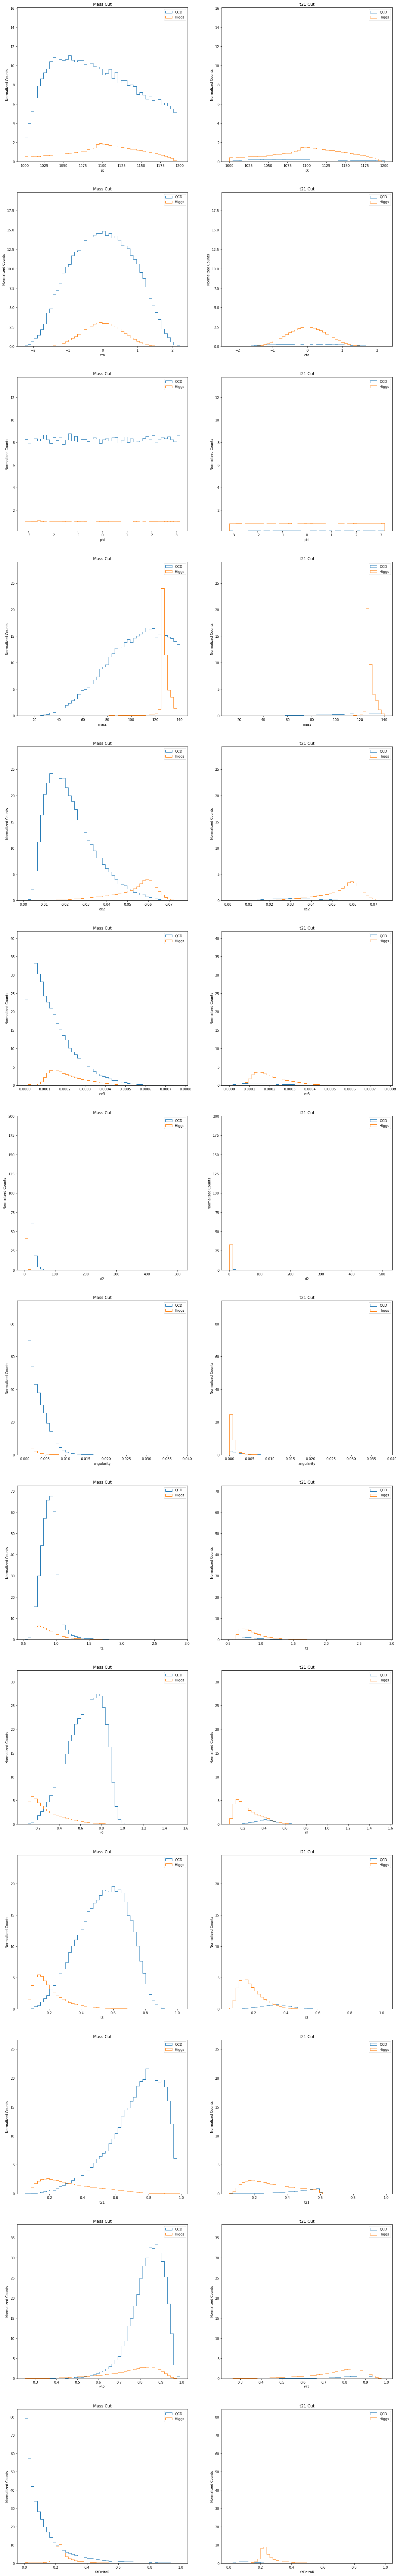

In [66]:
keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

#title = ['No Cut', 'Mass Cut', 't21 Cut']
title = ['Mass Cut', 't21 Cut']

normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)

cut_qcd = qcd[qcd['mass']<140]
cut_higgs = higgs[higgs['mass']<140]

cut2_qcd = cut_qcd[cut_qcd['t21'] < 0.6]
cut2_higgs = cut_higgs[cut_higgs['t21'] < 0.6]
    
normalization_qcd_cut = 2000/len(qcd)*len(cut_qcd)/len(qcd)
normalization_higgs_cut = 50/len(higgs)*len(cut_higgs)/len(higgs)

normalization_qcd_cut2 = 2000/len(qcd)*len(cut_qcd)/len(qcd)*len(cut2_qcd)/len(qcd)
normalization_higgs_cut2 = 50/len(higgs)*len(cut_higgs)/len(higgs)*len(cut2_higgs)/len(higgs)

def get_ylims(y3, y4, y5, y6):
    all_y = np.hstack((y3, y4, y5, y6))
    
    ymax = all_y.max()+5
    ymin = all_y.min()
    
    #print(all_y)
   
    return ymax, ymin

fig, ax = plt.subplots(14, 2, figsize = (20,140))

for i in range(len(keys)):
    #hist1 = ax[i,0].hist(qcd[keys[i]], weights = np.ones(len(qcd))*normalization_qcd, bins = 50, histtype = 'step', label = 'QCD');
    #hist2 = ax[i,0].hist(higgs[keys[i]], weights = np.ones(len(higgs))*normalization_higgs, bins = hist1[1], histtype = 'step', label = 'Higgs');

    hist3 = ax[i,0].hist(cut_qcd[keys[i]], weights = np.ones(len(cut_qcd))*normalization_qcd_cut, bins = 50, histtype = 'step', label = 'QCD');
    hist4 = ax[i,0].hist(cut_higgs[keys[i]], weights = np.ones(len(cut_higgs))*normalization_higgs_cut, bins = hist3[1], histtype = 'step', label = 'Higgs');

    hist5 = ax[i,1].hist(cut2_qcd[keys[i]], weights = np.ones(len(cut2_qcd))*normalization_qcd_cut2, bins = hist3[1], histtype = 'step', label = 'QCD');
    hist6 = ax[i,1].hist(cut2_higgs[keys[i]], weights = np.ones(len(cut2_higgs))*normalization_higgs_cut2, bins = hist3[1], histtype = 'step', label = 'Higgs');
    
    #ymax, ymin = get_ylims(hist1[0], hist2[0], hist3[0], hist4[0], hist5[0], hist6[0])
    ymax, ymin = get_ylims(hist3[0], hist4[0], hist5[0], hist6[0])

    
    for k in range(len(title)):
        ax[i,k].set_ylim(ymin, ymax)
        ax[i,k].set_title(title[k])
        ax[i,k].set_ylabel('Normalized Counts')
        ax[i,k].set_xlabel(keys[i])          
        ax[i,k].legend()

plt.show()

In [75]:
ktdeltar_cut = [0.1, 0.2]

for i in ktdeltar_cut:
    print(f'ktdeltar cut: {i}') 
    cut3_qcd = cut2_qcd[cut2_qcd['KtDeltaR'] > i]
    cut3_higgs = cut2_higgs[cut2_higgs['KtDeltaR'] > i]
    
    n_qcd = 2000/len(qcd)*len(cut_qcd)/len(qcd)*len(cut2_qcd)/len(qcd)*len(cut3_qcd)
    n_higgs = 50/len(higgs)*len(cut_higgs)/len(higgs)*len(cut2_higgs)/len(qcd)*len(cut3_higgs)

    print(f'N_qcd: {n_qcd:0.3f} N_higgs: {n_higgs:0.3f}')

    prob = stats.poisson.sf(n_qcd + n_higgs, n_qcd)
    sigma = stats.norm.isf(prob)

    approx_sigma = n_higgs/np.sqrt(n_qcd)

    print(f'sigma: {sigma:.3f} approximate sigma: {approx_sigma:.3f}\n')

ktdeltar cut: 0.1
N_qcd: 5.591 N_higgs: 39.847
sigma: 10.579 approximate sigma: 16.852

ktdeltar cut: 0.2
N_qcd: 2.263 N_higgs: 35.957
sigma: 12.129 approximate sigma: 23.902



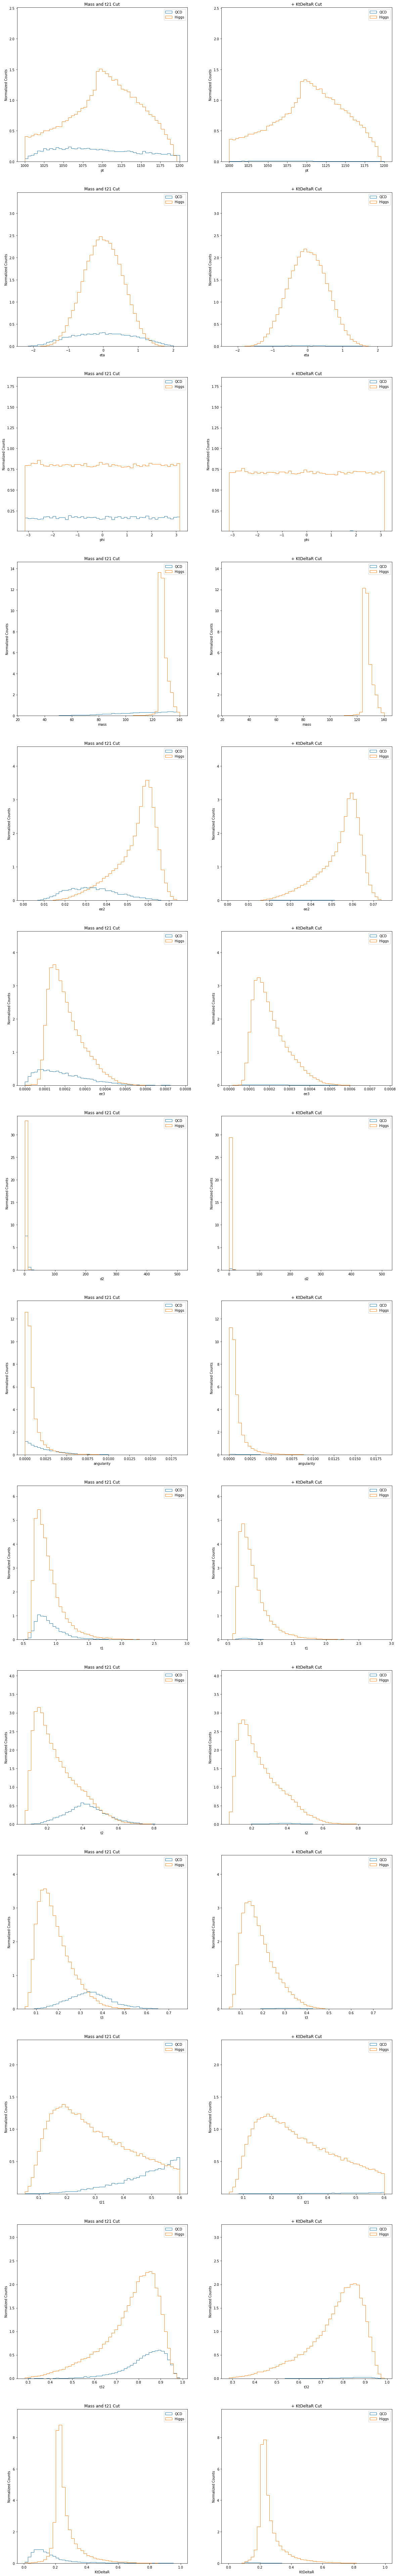

In [76]:
keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

title = ['Mass and t21 Cut', '+ KtDeltaR Cut']

normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)

cut_qcd = qcd[qcd['mass']<140]
cut_higgs = higgs[higgs['mass']<140]

cut2_qcd = cut_qcd[cut_qcd['t21'] < 0.6]
cut2_higgs = cut_higgs[cut_higgs['t21'] < 0.6]

cut3_qcd = cut2_qcd[cut2_qcd['KtDeltaR'] > 0.1]
cut3_higgs = cut2_higgs[cut2_higgs['KtDeltaR'] > 0.1]
    
normalization_qcd_cut2 = 2000/len(qcd)*len(cut_qcd)/len(qcd)*len(cut2_qcd)/len(qcd)
normalization_higgs_cut2 = 50/len(higgs)*len(cut_higgs)/len(higgs)*len(cut2_higgs)/len(higgs)

normalization_qcd_cut3 = 2000/len(qcd)*len(cut_qcd)/len(qcd)*len(cut2_qcd)/len(qcd)*len(cut3_qcd)/len(qcd)
normalization_higgs_cut3 = 50/len(higgs)*len(cut_higgs)/len(higgs)*len(cut2_higgs)/len(higgs)*len(cut3_higgs)/len(higgs)

def get_ylims(y1, y2, y3, y4):
    all_y = np.hstack((y1, y2, y3, y4))
    
    ymax = all_y.max()+1
    ymin = all_y.min()
    
    #print(all_y)
   
    return ymax, ymin

fig, ax = plt.subplots(14, 2, figsize = (20,140))

for i in range(len(keys)):
   
    hist1 = ax[i,0].hist(cut2_qcd[keys[i]], weights = np.ones(len(cut2_qcd))*normalization_qcd_cut2, bins = 50, histtype = 'step', label = 'QCD');
    hist2 = ax[i,0].hist(cut2_higgs[keys[i]], weights = np.ones(len(cut2_higgs))*normalization_higgs_cut2, bins = hist1[1], histtype = 'step', label = 'Higgs');

    hist3 = ax[i,1].hist(cut3_qcd[keys[i]], weights = np.ones(len(cut3_qcd))*normalization_qcd_cut3, bins = hist1[1], histtype = 'step', label = 'QCD');
    hist4 = ax[i,1].hist(cut3_higgs[keys[i]], weights = np.ones(len(cut3_higgs))*normalization_higgs_cut3, bins = hist1[1], histtype = 'step', label = 'Higgs');
    
    ymax, ymin = get_ylims(hist1[0], hist2[0], hist3[0], hist4[0])

    
    for k in range(len(title)):
        ax[i,k].set_ylim(ymin, ymax)
        ax[i,k].set_title(title[k])
        ax[i,k].set_ylabel('Normalized Counts')
        ax[i,k].set_xlabel(keys[i])          
        ax[i,k].legend()

plt.show()

Overall, I chose the cuts: mass < 140, t21 < 0.6, ktdeltar > 0.1. These cuts give a sigma of around 10.5

## Testing out some supervised learning:

In [33]:
keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

X = pd.concat([higgs, qcd], ignore_index = True)
Y = np.hstack((np.ones(len(higgs)), np.zeros(len(qcd))))

print(X.shape, Y.shape)

(200000, 14) (200000,)


In [20]:
clf1 = RandomForestClassifier(n_estimators = 10)
clf1 = clf1.fit(X,Y)

feature_importance1 = np.vstack((keys, clf1.feature_importances_))
feature_importance1.sort(axis = 1)
for i in range(len(feature_importance1[0])):
    print(f'{feature_importance1[0][i]}: {float(feature_importance1[1][i]):.3f}')

KtDeltaR: 0.007
angularity: 0.011
d2: 0.013
ee2: 0.015
ee3: 0.018
eta: 0.032
mass: 0.061
phi: 0.064
pt: 0.075
t1: 0.098
t2: 0.109
t21: 0.124
t3: 0.131
t32: 0.241


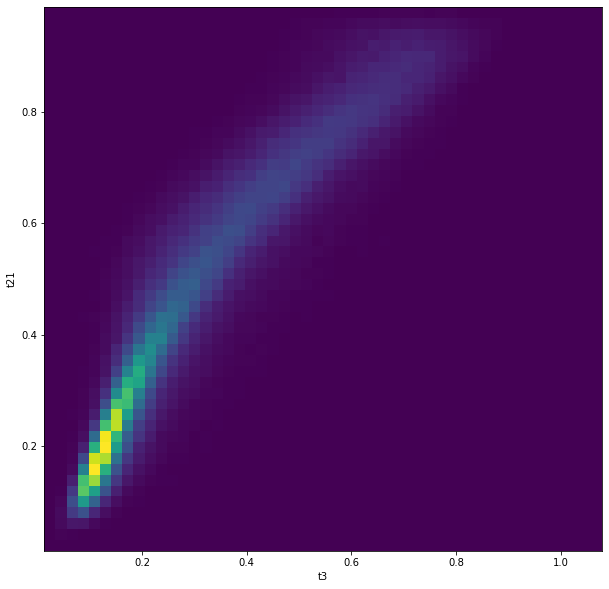

In [52]:
X = pd.concat([higgs, qcd], ignore_index = True)
Y = np.hstack((np.ones(len(higgs)), np.zeros(len(qcd))))

fig, ax = plt.subplots(figsize = (10,10))
ax.hist2d(X['t3'], X['t21'], bins = 50)
ax.set_xlabel('t3')
ax.set_ylabel('t21')
plt.show()

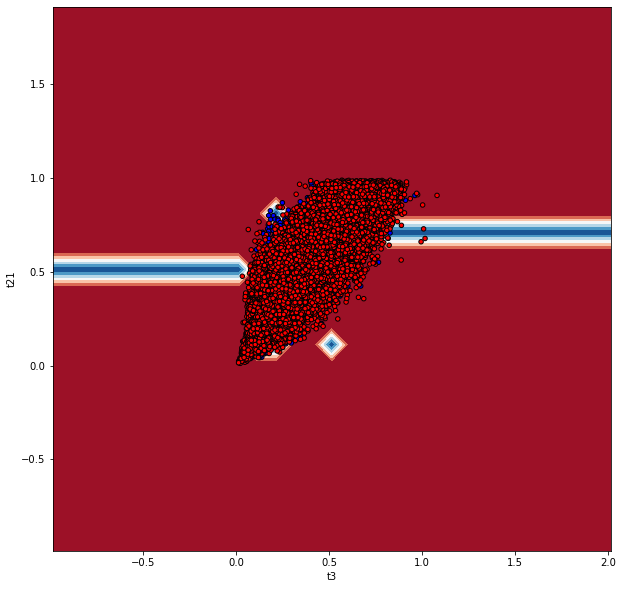

In [58]:
from matplotlib.colors import ListedColormap

X = pd.concat([higgs.loc[:, ['t3', 't21']], qcd.loc[:,['t3', 't21']]]).to_numpy()
Y = np.hstack((np.ones(len(higgs)), np.zeros(len(qcd))))

cmap = plt.cm.RdBu

clf2 = RandomForestClassifier(n_estimators = 10)
clf2 = clf2.fit(X,Y)

#take bounds
xmin, xmax = X[:, 0].min()-1, X[:, 0].max()+1
ymin, ymax = X[:, 1].min()-1, X[:, 1].max()+1

xgrid = np.arange(xmin, xmax, 0.1)
ygrid = np.arange(ymin, ymax, 0.1)

xx, yy = np.meshgrid(xgrid, ygrid)

# make predictions for the grid
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
# reshape the predictions back into a grid
zz = Z.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
fig, ax = plt.subplots(figsize = (10,10))
ax.contourf(xx, yy, zz, cmap = cmap)
ax.scatter(
            X[:, 0],
            X[:, 1],
            c=Y,
            cmap=ListedColormap(["r", "b"]),
            edgecolor="k",
            s=20,
        )

ax.set_xlabel('t3')
ax.set_ylabel('t21')
plt.show()

This doesn't make any sense